In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

## Basic data exploration

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
corr_bmi_char = df['bmi'].corr(df['charges'])

In [6]:
corr_bmi_char

0.1983409688336289

<Axes: xlabel='bmi', ylabel='Count'>

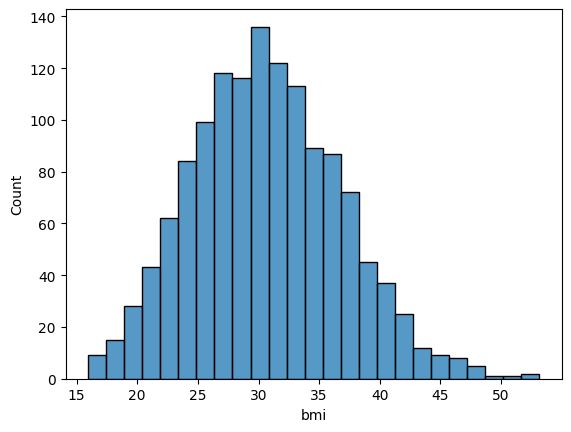

In [7]:
sns.histplot(x='bmi', data=df)

<Axes: ylabel='bmi'>

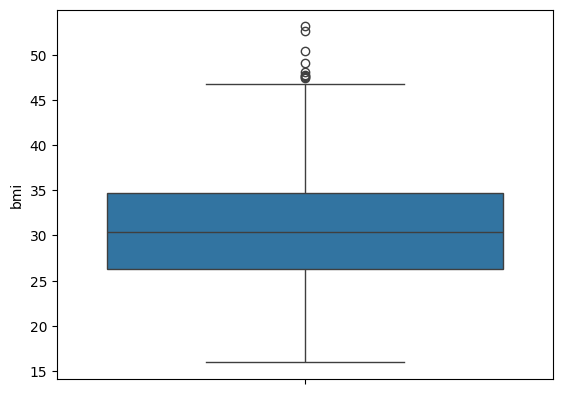

In [8]:
sns.boxplot(y='bmi', data=df)

<Axes: ylabel='charges'>

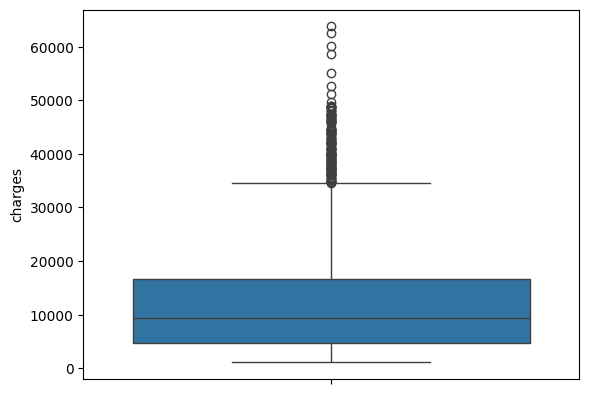

In [9]:
sns.boxplot(y='charges', data=df)

## Outliers elimination

In [10]:
# z_scores = (df['charges'] - df['charges'].mean()) / df['charges'].std()
# outliers = df[z_scores > 1.8]

In [11]:
# df_cleaned = df[~df.index.isin(outliers.index)]


In [12]:
# df_cleaned.info()

In [13]:
# df = df_cleaned

In [14]:
df['charges_log'] = np.log(df['charges'])

In [15]:
corr_age = df['age'].corr(df['charges'])
corr_age

0.29900819333064776

## Data Encoding

In [16]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})

In [17]:
corr_smoke = df['smoker_int'].corr(df['charges'])
corr_smoke

0.7872514304984778

In [18]:
df['gender_int'] = df['sex'].map({'male':1, 'female':0})

In [19]:
corr_gender = df['gender_int'].corr(df['charges'])
corr_gender

0.05729206220202534

In [20]:
corr_child = df['children'].corr(df['charges'])
corr_child

0.06799822684790487

In [21]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [22]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [23]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   charges      1338 non-null   float64
 4   charges_log  1338 non-null   float64
 5   smoker_int   1338 non-null   int64  
 6   gender_int   1338 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


# Test train Split 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = df.drop('charges', axis=1)
y = df['charges']

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=500)

In [29]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn import metrics

In [33]:
model = DecisionTreeRegressor(max_depth=6,random_state=42)

In [34]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [35]:
y_pred = model.predict(X_val)

In [36]:
y_test.shape

(134,)

In [37]:
y_pred.shape

(134,)

# Decision tree Final Prediction

In [38]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

MAE: 189.5310068000089
MSE: 60376.84698648662
RMSE: 245.71700589598316


In [39]:
y_pred = model.predict(X_test)

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 190.56556403368825
MSE: 82569.08156142946
RMSE: 287.3483627262029


# k-fold cross validation

In [41]:
from sklearn.metrics import make_scorer, mean_squared_error

In [42]:
from sklearn.model_selection import cross_val_score,KFold

In [43]:
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [44]:
rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

In [45]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)

In [46]:
cv_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)

In [47]:
print(f"Cross-validated RMSE scores: {cv_scores}")
print(f"Mean RMSE: {-np.mean(cv_scores)}")

Cross-validated RMSE scores: [-229.90661307 -286.28767747 -241.14774613 -249.58019153 -202.83819588
 -262.50656672 -429.74968078 -276.77790707 -260.08565866 -331.83619459
 -276.50599861 -391.13737112 -261.52320535 -417.90005058 -244.83123165]
Mean RMSE: 290.84095261293913


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rfr = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

In [50]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [51]:
predictions = rfr.predict(X_val)

## Random Forest Final prediction

In [52]:
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 157.598249108334
MSE: 38017.066359822835
RMSE: 194.9796562716809


In [53]:
predictions2 = rfr.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 186.44199507243994
MSE: 65947.8798064971
RMSE: 256.803192749812


In [55]:
cv_scores = cross_val_score(rfr, X, y, cv=kf, scoring=rmse_scorer)

In [56]:
print(f"Cross-validated RMSE scores: {cv_scores}")
print(f"Mean RMSE: {-np.mean(cv_scores)}")

Cross-validated RMSE scores: [-173.17390894 -230.55348207 -545.56827667 -182.80173026 -151.64502325
 -218.34947344 -235.49853254 -177.45911896 -202.21165761 -196.3786646
 -261.39569899 -362.76202033 -394.66392162 -169.44539024 -251.72792408]
Mean RMSE: 250.24232157292874


# XGBoost

In [57]:
from xgboost import XGBRegressor

In [58]:
xgbr = XGBRegressor(objective='reg:squarederror',max_depth=2,random_state=42,n_estimators=40,learning_rate=0.4,
                    colsample_bytree=1,grow_policy='lossguide',importance_type='gain')

In [59]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
y_pred = xgbr.predict(X_val)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

MAE: 339.4429595504897
MSE: 267669.58330341073
RMSE: 517.3679380319297


In [62]:
y_pred = xgbr.predict(X_test)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 356.00621556990444
MSE: 285269.3071568566
RMSE: 534.1060823065551


In [64]:
cv_scores = cross_val_score(xgbr, X, y, cv=kf, scoring=rmse_scorer)

In [65]:
print(f"Cross-validated RMSE scores: {cv_scores}")
print(f"Mean RMSE: {-np.mean(cv_scores)}")

Cross-validated RMSE scores: [-485.96251543 -493.26852896 -990.55121515 -382.83946267 -389.20184805
 -490.62429824 -969.82608255 -461.55317195 -377.60148106 -515.59673158
 -444.29663512 -488.10338472 -861.69014932 -508.88320057 -446.14098297]
Mean RMSE: 553.7426458899826
